In [ ]:
!pip install numpy pandas nltk scikit-learn textblob spacy torch transformers matplotlib
!python -m spacy download en_core_web_sm
!pip install PyPDF2


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 45.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 53.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 24.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 61.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [ ]:
!pip install PyPDF2
!pip install pdfplumber


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.2/48.2 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.2/60.2 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 71.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 60.7 MB/s eta 0:00:00


In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
import numpy as np
import pandas as pd
from collections import Counter
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from textblob import TextBlob
import spacy
import torch
from transformers import BertTokenizer, BertForSequenceClassification
from scipy.ndimage import gaussian_filter1d
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from huggingface_hub import hf_hub_download
import json
import difflib
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter
import os
import matplotlib.pyplot as plt
import pdfplumber

In [ ]:
from huggingface_hub import snapshot_download
snapshot_download("joeddav/distilbert-base-uncased-go-emotions-student")
#, force_download=True)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Fetching 8 files:   0%|          | 0/8 [00:00<?, ?it/s]

pytorch_model.bin:   0%|          | 0.00/268M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.75k [00:00<?, ?B/s]

tf_model.h5:   0%|          | 0.00/268M [00:00<?, ?B/s]

.gitattributes:   0%|          | 0.00/690 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/421 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/1.05k [00:00<?, ?B/s]

'/root/.cache/huggingface/hub/models--joeddav--distilbert-base-uncased-go-emotions-student/snapshots/8f145be763be749ae21d1209758c855d5ddf1b9c'

In [ ]:
# Paste the entire content of feature_extraction.py here

class BookFeatureExtractor:
    """
    Extracts emotional and thematic features from books for recommendation systems.
    Implements the methodology described in the project documentation.
    """

    def __init__(self, emotion_lexicon_path=None, model_path=None):
        """
        Initialize the feature extractor with necessary resources.

        Args:
            emotion_lexicon_path (str): Path to the emotion lexicon file
            model_path (str): Path to pre-trained or fine-tuned BERT model
        """
        # Initialize NLP tools
        self.lemmatizer = WordNetLemmatizer()
        self.stop_words = set(stopwords.words('english'))

        # Load emotion lexicon (sample format: word,emotion1,emotion2)
        self.emotion_lexicon = self._load_emotion_lexicon(emotion_lexicon_path)

        # Load NER model for character detection
        self.nlp = spacy.load("en_core_web_sm")
        self.nlp.max_length = 3_500_000

        # Load BERT model for emotion classification
        if model_path:
            self.tokenizer = BertTokenizer.from_pretrained(model_path)
            self.model = BertForSequenceClassification.from_pretrained(model_path)
        else:
            # Default to pre-trained model if no fine-tuned model is provided
            self.tokenizer = AutoTokenizer.from_pretrained("joeddav/distilbert-base-uncased-go-emotions-student")
            self.model = AutoModelForSequenceClassification.from_pretrained("joeddav/distilbert-base-uncased-go-emotions-student")


        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        self.model.to(self.device)


        # Define Plutchik's 8 emotions
        self.plutchik_emotions = [
            "joy", "trust", "fear", "surprise",
            "sadness", "disgust", "anger", "anticipation"
        ]
        # Labels from `nateraw/bert-base-uncased-emotion`
        # Official GoEmotions labels
        emotion_labels = [
            'admiration', 'amusement', 'anger', 'annoyance', 'approval', 'caring',
            'confusion', 'curiosity', 'desire', 'disappointment', 'disapproval',
            'disgust', 'embarrassment', 'excitement', 'fear', 'gratitude', 'grief',
            'joy', 'love', 'nervousness', 'optimism', 'pride', 'realization',
            'relief', 'remorse', 'sadness', 'surprise', 'neutral'
        ]

        self.emotion_labels = emotion_labels


    def _load_emotion_lexicon(self, lexicon_path):
        """
        Load emotion lexicon from file.

        Args:
            lexicon_path (str): Path to lexicon file

        Returns:
            dict: Word to emotions mapping
        """
        if not lexicon_path:
            # Return a small sample lexicon for testing
            return {
                "happy": ["joy"], "sad": ["sadness"],
                "angry": ["anger"], "afraid": ["fear"]
            }

        lexicon = {}
        with open(lexicon_path, 'r') as file:
            for line in file:
                parts = line.strip().split(',')
                word = parts[0]
                emotions = parts[1:]
                lexicon[word] = emotions

        return lexicon
    def clean_gutenberg_text(self, text):
        """
        Remove Project Gutenberg's header and footer boilerplate, accounting for variations.

        Args:
            text (str): Raw book text

        Returns:
            str: Cleaned book text
        """
        import re

        # Define robust patterns to detect start and end
        start_pattern = re.compile(r'\*+\s*START OF (THE|THIS) PROJECT GUTENBERG EBOOK.*', re.IGNORECASE)
        end_pattern = re.compile(r'\*+\s*END OF (THE|THIS) PROJECT GUTENBERG EBOOK.*', re.IGNORECASE)

        lines = text.splitlines()
        start_idx, end_idx = 0, len(lines)

        for i, line in enumerate(lines):
            if start_pattern.search(line):
                start_idx = i + 1  # skip the matched line
                break

        for i in range(len(lines)-1, -1, -1):
            if end_pattern.search(lines[i]):
                end_idx = i
                break

        return "\n".join(lines[start_idx:end_idx]).strip()

    def preprocess_text(self, text):
        """
        Clean and preprocess text for analysis.

        Args:
            text (str): Raw text content

        Returns:
            list: Processed tokens
            list: Processed sentences
        """
        # Convert to lowercase
        text = text.lower()

        # Remove non-alphanumeric characters
        text = re.sub(r'[^a-zA-Z0-9\s]', '', text)

        # Tokenize into sentences
        sentences = sent_tokenize1(text)

        # Tokenize and lemmatize words, remove stopwords
        processed_tokens = []
        for sentence in sentences:
            tokens = [token.text for token in self.nlp(sentence)]
            tokens = [self.lemmatizer.lemmatize(token) for token in tokens
                     if token not in self.stop_words]
            processed_tokens.extend(tokens)

        return processed_tokens, sentences

    def segment_by_chapter(self, text):
        """
        Split book text into chapters.

        Args:
            text (str): Full book text

        Returns:
            list: List of chapters
        """
        # Match common chapter patterns
        chapter_patterns = [
            r'Chapter \d+', r'CHAPTER \d+',
            r'Chapter [IVXLCDM]+', r'CHAPTER [IVXLCDM]+'
        ]

        pattern = '|'.join(chapter_patterns)
        chapters = re.split(pattern, text)

        # Remove empty chapters and trim whitespace
        chapters = [chapter.strip() for chapter in chapters if chapter.strip()]

        return chapters

    def extract_lexicon_based_emotions(self, tokens):
        """
        Extract emotions based on lexicon matching.

        Args:
            tokens (list): Processed word tokens

        Returns:
            dict: Emotion counts and normalized scores
        """
        emotion_counts = {emotion: 0 for emotion in self.emotion_labels}

        for token in tokens:
            if token in self.emotion_lexicon:
                for emotion in self.emotion_lexicon[token]:
                    if emotion in emotion_counts:
                        emotion_counts[emotion] += 1

        # Normalize counts
        total = sum(emotion_counts.values())
        emotion_scores = emotion_counts.copy()

        if total > 0:
            for emotion in emotion_scores:
                emotion_scores[emotion] = emotion_scores[emotion] / total

        return {
            "counts": emotion_counts,
            "scores": emotion_scores
        }
    def chunk_sentences(self, sentences, chunk_size=5):
      """Yield successive chunks from list of sentences."""
      for i in range(0, len(sentences), chunk_size):
          yield sentences[i:i + chunk_size]

    def extract_bert_emotions(self, text, batch_size=4):
        """
        Use fine-tuned BERT to classify text into Plutchik's 8 emotions.

        Args:
            text (str): Text to analyze
            batch_size (int): Batch size for processing

        Returns:
            dict: Emotion classification results
        """
        # This is a simplified implementation assuming the model is fine-tuned
        # for multi-label classification of Plutchik's emotions

        sentences = sent_tokenize1(text)
        results = {emotion: 0 for emotion in self.emotion_labels}
        all_probs = []


        # Process in batches
        for batch in self.chunk_sentences(sentences, chunk_size=5):
            inputs = self.tokenizer(
                batch,
                padding=True,
                truncation=True,
                return_tensors="pt",
                max_length=512
            ).to(self.device)

            with torch.no_grad():
                outputs = self.model(**inputs)

            logits = outputs.logits
            probs = torch.softmax(logits, dim=1)
            all_probs.append(probs.cpu())
        if not all_probs:
            return {label: 0.0 for label in self.emotion_labels}

        all_probs_tensor = torch.cat(all_probs, dim=0)
        avg_probs = torch.mean(all_probs_tensor, dim=0).numpy()
        #print(f"[DEBUG] Number of output emotions: {avg_probs.shape[0]}")

        num_output_labels = avg_probs.shape[0]
        used_labels = self.emotion_labels[:num_output_labels]
        emotion_scores = {label: float(avg_probs[i]) for i, label in enumerate(used_labels)}

        #print(f"[DEBUG] Emotion probabilities shape: {avg_probs.shape}")  # Should be (28,)
        #print(f"[DEBUG] Top 5 emotions: {sorted(emotion_scores.items(), key=lambda x: x[1], reverse=True)[:5]}")


        return emotion_scores
        '''
            # Aggregate results
            for pred in predictions:
                for j, score in enumerate(pred):
                    if j < len(self.plutchik_emotions):
                        results[self.plutchik_emotions[j]] += score.item()

        # Normalize results
        total = sum(results.values())
        if total > 0:
            for emotion in results:
                results[emotion] = results[emotion] / total

        return results'''

    def extract_polarity_with_textblob(self, sentences):
        """
        Extract sentiment polarity using TextBlob.

        Args:
            sentences (list): List of sentences

        Returns:
            list: Polarity scores for each sentence
        """
        polarity_scores = []

        for sentence in sentences:
            analysis = TextBlob(sentence)
            polarity_scores.append(analysis.sentiment.polarity)

        return polarity_scores

    def extract_character_emotions(self, text):
        """
        Extract emotions associated with main characters using BERT.

        Args:
            text (str): Book text

        Returns:
            dict: Character emotions mapping
        """
        paragraphs = text.split('\n\n')
        mention_counts = {}
        character_contexts = {}

        for paragraph in paragraphs:
            if len(paragraph.strip()) == 0 or len(paragraph) > 100000:
                continue

            try:
                doc = self.nlp(paragraph)
            except Exception as e:
                print(f"[WARNING] Skipped paragraph due to parsing error: {e}")
                continue

            for ent in doc.ents:
                if ent.label_ == "PERSON":
                    name = ent.text.strip()
                    mention_counts[name] = mention_counts.get(name, 0) + 1
                    character_contexts.setdefault(name, []).append(paragraph)


        #trial
        merged = {}
        for name in character_contexts:
            found = False
            for canon in merged:
                if difflib.SequenceMatcher(None, name, canon).ratio() > 0.85:
                    merged[canon].extend(character_contexts[name])
                    found = True
                    break
            if not found:
                merged[name] = character_contexts[name]


        # Get top 10 most mentioned characters
        top_characters = sorted(mention_counts.items(), key=lambda x: x[1], reverse=True)[:10]

        character_emotions = {}
        for name, _ in top_characters:
            context_text = " ".join(character_contexts[name])
            if context_text.strip():
                emotion_scores = self.extract_bert_emotions(context_text)
                character_emotions[name] = emotion_scores

        return character_emotions

    def get_custom_stopwords_from_entities(self, text, nlp, top_n=5):
          doc = nlp(text)
          people = [ent.text.lower() for ent in doc.ents if ent.label_ == "PERSON"]
          most_common = [name for name, _ in Counter(people).most_common(top_n)]
          return set(most_common)


    def extract_tfidf_features(self, chapters):
        """
        Extract TF-IDF features from book chapters.

        Args:
            chapters (list): List of book chapters

        Returns:
            array: TF-IDF matrix
            list: Feature names
        """

                # Get common character names dynamically
        full_text = " ".join(chapters)
        custom_stopwords = self.get_custom_stopwords_from_entities(full_text, self.nlp)

        processed_chapters = []
        for chapter in chapters:
            # Lowercase
            chapter = chapter.lower()
            # Remove non-alphabetic characters
            chapter = re.sub(r'[^a-zA-Z\s]', ' ', chapter)

            # Tokenize with spaCy
            tokens = [token for token in self.nlp(chapter)]

            # Filter: keep nouns and adjectives, remove verbs, stopwords, and named entities
            filtered_tokens = [
                self.lemmatizer.lemmatize(token.text.lower())
                for token in tokens
                if token.pos_ in {"NOUN", "ADJ"}
                and token.text.lower() not in self.stop_words
                and token.ent_type_ != "PERSON"
                and token.text.lower() not in custom_stopwords
            ]

            cleaned = " ".join(filtered_tokens)
            processed_chapters.append(cleaned)

        # Apply CountVectorizer with bigram support and improved stopword filtering
        vectorizer = CountVectorizer(
            max_df=0.8,
            min_df=5,
            stop_words='english',
            ngram_range=(1, 2)  # unigrams and bigrams
        )
        tfidf_matrix = vectorizer.fit_transform(processed_chapters)

        return tfidf_matrix, vectorizer.get_feature_names_out()



    def extract_topics_with_lda(self, doc_term_matrix, feature_names, num_topics=8):
      lda = LatentDirichletAllocation(n_components=num_topics, max_iter=15, learning_method='online', random_state=42)
      lda.fit(doc_term_matrix)

      topics = {}
      for topic_idx, topic in enumerate(lda.components_):
          top_words_idx = topic.argsort()[:-11:-1]
          top_words = [feature_names[i] for i in top_words_idx]
          topics[f"Topic {topic_idx}"] = top_words

      doc_topic_dist = lda.transform(doc_term_matrix)

      return topics, doc_topic_dist


    def extract_topics_with_lda(self, tfidf_matrix, feature_names, num_topics=10):
        """
        Extract topics using Latent Dirichlet Allocation.

        Args:
            tfidf_matrix: TF-IDF matrix
            feature_names: Feature names from the vectorizer
            num_topics (int): Number of topics to extract

        Returns:
            dict: Topics with top words
            array: Document-topic distribution
        """
        lda = LatentDirichletAllocation(n_components=num_topics, max_iter=15, learning_method='online', random_state=42)
        lda.fit(tfidf_matrix)

        topics = {}
        for topic_idx, topic in enumerate(lda.components_):
            top_words_idx = topic.argsort()[:-11:-1]  # Get top 10 words
            top_words = [feature_names[i] for i in top_words_idx]
            topics[f"topic_{topic_idx}"] = top_words

        # Get document-topic distribution
        doc_topic_dist = lda.transform(tfidf_matrix)

        return topics, doc_topic_dist

    def create_sentiment_trajectory(self, chapters):
        """
        Create a sentiment trajectory for the book.

        Args:
            chapters (list): List of book chapters

        Returns:
            dict: Sentiment trajectory data
        """
        trajectory = {
            "polarity": [],
            "emotions": {emotion: [] for emotion in self.emotion_labels},
            "chapter_boundaries": []
        }

        current_position = 0

        for chapter in chapters:
            tokens, sentences = self.preprocess_text(chapter)

            # Get polarity
            polarity_scores = self.extract_polarity_with_textblob(sentences)
            avg_polarity = sum(polarity_scores) / len(polarity_scores) if polarity_scores else 0
            trajectory["polarity"].append(avg_polarity)

            # Get emotions
            #emotions = self.extract_lexicon_based_emotions(tokens)
            chapter_text = " ".join(sentences)
            emotions = self.extract_bert_emotions(chapter_text)

            for emotion in self.emotion_labels:
                #trajectory["emotions"][emotion].append(emotions["scores"].get(emotion, 0))
                trajectory["emotions"][emotion].append(emotions.get(emotion, 0))

            # Track chapter boundary
            current_position += len(sentences)
            trajectory["chapter_boundaries"].append(current_position)

        return trajectory

    def apply_rolling_average(self, trajectory, window=3):
        """
        Apply rolling average smoothing to the sentiment trajectory.

        Args:
            trajectory (dict): Sentiment trajectory
            window (int): Window size for rolling average

        Returns:
            dict: Smoothed trajectory
        """
        smoothed = trajectory.copy()

        # Smooth polarity
        polarity = np.array(trajectory["polarity"])
        smoothed["polarity"] = np.convolve(polarity, np.ones(window)/window, mode='valid').tolist()

        # Smooth emotions
        for emotion in self.emotion_labels:
            values = np.array(trajectory["emotions"][emotion])
            smoothed["emotions"][emotion] = np.convolve(values, np.ones(window)/window, mode='valid').tolist()

        # Adjust chapter boundaries
        offset = (window - 1) // 2
        smoothed["chapter_boundaries"] = trajectory["chapter_boundaries"][offset:len(smoothed["polarity"])+offset]

        return smoothed
    from scipy.ndimage import gaussian_filter1d

    def apply_gaussian_smoothing(self, trajectory, sigma=1):
        """
        Apply Gaussian smoothing to the sentiment trajectory.

        Args:
            trajectory (dict): Sentiment trajectory
            sigma (int): Standard deviation for Gaussian kernel

        Returns:
            dict: Smoothed trajectory
        """
        smoothed = {
            "polarity": [],
            "emotions": {emotion: [] for emotion in self.emotion_labels},
            "chapter_boundaries": trajectory["chapter_boundaries"]  # optional: leave as-is
        }

        # Smooth polarity
        polarity_array = np.array(trajectory["polarity"])
        smoothed["polarity"] = gaussian_filter1d(polarity_array, sigma=sigma).tolist()

        # Smooth emotions
        for emotion in self.emotion_labels:
            values = np.array(trajectory["emotions"][emotion])
            smoothed["emotions"][emotion] = gaussian_filter1d(values, sigma=sigma).tolist()

        return smoothed
    def infer_genre_from_profile(self, profile, title=None):
        import collections

        # Combine all LDA topic words into a flat list
        topic_words = sum(profile['topics'].values(), [])
        topic_counts = collections.Counter(topic_words)

        # Normalize scores
        emotions = profile['overall_emotions']
        dominant_emotion = max(emotions, key=emotions.get) if emotions else "neutral"

        # Heuristic genre rules
        genre_scores = collections.defaultdict(float)

        # --- Romance ---
        romance_keywords = {"love", "marriage", "kiss", "heart", "affection", "wedding"}
        if romance_keywords & topic_counts.keys():
            genre_scores["romance"] += 1.5
        if emotions.get("love", 0) > 0.1 or emotions.get("joy", 0) > 0.1:
            genre_scores["romance"] += 1.0

        # --- Mystery / Thriller ---
        mystery_keywords = {"murder", "crime", "detective", "clue", "secret", "investigation"}
        if mystery_keywords & topic_counts.keys():
            genre_scores["mystery"] += 1.5
        if emotions.get("fear", 0) > 0.1 or emotions.get("surprise", 0) > 0.1:
            genre_scores["mystery"] += 1.0

        # --- Science Fiction ---
        sci_fi_keywords = {"alien", "spaceship", "robot", "planet", "future", "technology", "space"}
        if sci_fi_keywords & topic_counts.keys():
            genre_scores["science fiction"] += 1.5

        # --- Fantasy ---
        fantasy_keywords = {"magic", "dragon", "kingdom", "spell", "wizard", "sword"}
        if fantasy_keywords & topic_counts.keys():
            genre_scores["fantasy"] += 1.5

        # --- Historical Fiction ---
        historical_keywords = {"duke", "empire", "king", "queen", "castle", "war", "soldier", "revolution"}
        if historical_keywords & topic_counts.keys():
            genre_scores["historical fiction"] += 1.2
        if title and any(w in title.lower() for w in ["history", "war", "reign", "empire"]):
            genre_scores["historical fiction"] += 0.5

        # --- General Fiction fallback ---
        genre_scores["general fiction"] += 0.1  # base fallback score

        # Pick top genre
        best_genre = max(genre_scores.items(), key=lambda x: x[1])[0]
        return best_genre



    def extract_book_profile(self, title, text):
        """
        Extract a comprehensive book profile with all features.

        Args:
            text (str): Book text

        Returns:
            dict: Book profile with emotional and thematic features
        """
        # Clean Gutenberg metadata
        text = self.clean_gutenberg_text(text)

        # Segment book into chapters
        chapters = self.segment_by_chapter(text)

        # Process full text
        all_tokens, all_sentences = self.preprocess_text(text)

        # Extract overall emotion profile
        emotion_profile = self.extract_lexicon_based_emotions(all_tokens)

        # Extract sentiment trajectory
        trajectory = self.create_sentiment_trajectory(chapters)

        # Apply smoothing
        #smoothed_trajectory = self.apply_rolling_average(trajectory)
        smoothed_trajectory = self.apply_gaussian_smoothing(trajectory, sigma=1)

        # Extract TF-IDF features and topics
        tfidf_matrix, feature_names = self.extract_tfidf_features(chapters)
        topics, doc_topic_dist = self.extract_topics_with_lda(tfidf_matrix, feature_names)

        # Extract character emotions
        character_emotions = self.extract_character_emotions(text)

        # Compile book profile
        book_profile = {
            "overall_emotions": emotion_profile["scores"],
            "sentiment_trajectory": {
                "raw": trajectory,
                "smoothed": smoothed_trajectory
            },
            "topics": topics,
            "chapter_topic_distribution": doc_topic_dist.tolist(),
            "character_emotions": character_emotions
        }

        genre = self.infer_genre_from_profile(book_profile, title=title)

        book_profile = {
            "title": title,
            "genre": genre,
            "overall_emotions": emotion_profile["scores"],
            "sentiment_trajectory": {
                "raw": trajectory,
                "smoothed": smoothed_trajectory
            },
            "topics": topics,
            "chapter_topic_distribution": doc_topic_dist.tolist(),
            "character_emotions": character_emotions
        }

        return book_profile

def sent_tokenize1(text):
    # Basic sentence splitter using punctuation (approximate)
    return [s.strip() for s in re.split(r'(?<=[.!?])\s+', text) if s.strip()]

In [ ]:
# Paste the entire content of example_analysis.py here, but remove the if __name__ == "__main__" block at the end
def load_book(book_path):
    """Load a book from file."""
    with open(book_path, 'r', encoding='utf-8', errors='ignore') as f:
        return f.read()

def load_book_pdf(book_path):
    if book_path.lower().endswith(".pdf"):
        text = ""
        with pdfplumber.open(book_path) as pdf:
            for page in pdf.pages:
                page_text = page.extract_text()
                if page_text:
                    text += page_text + "\n"
        return text
    else:
        with open(book_path, 'r', encoding='utf-8', errors='ignore') as f:
            return f.read()


def save_profile(profile, output_path):
    """Save the extracted profile as JSON."""
    with open(output_path, 'w') as f:
        json.dump(profile, f, indent=2)
    print(f"Book profile saved to {output_path}")

def plot_sentiment_trajectory(profile, output_dir):
    """Plot the sentiment trajectory of the book."""
    # Create output directory if it doesn't exist
    os.makedirs(output_dir, exist_ok=True)

    # Get data
    trajectory = profile["sentiment_trajectory"]["smoothed"]
    polarity = trajectory["polarity"]
    emotions = trajectory["emotions"]

    # Plot polarity
    plt.figure(figsize=(12, 6))
    plt.plot(polarity)
    plt.title("Sentiment Polarity Throughout the Book")
    plt.xlabel("Chapter")
    plt.ylabel("Polarity (-1 to 1)")
    plt.grid(True, alpha=0.3)
    plt.savefig(os.path.join(output_dir, "polarity_trajectory.png"))

    # Plot emotions
    plt.figure(figsize=(12, 8))
    #for emotion, values in emotions.items():
    #    plt.plot(values, label=emotion.capitalize())
    N = 10
    avg_intensity = {e: np.mean(v) for e, v in emotions.items()}
    top_emotions = sorted(avg_intensity.items(), key=lambda x: x[1], reverse=True)[:N]
    top_emotions = {e: emotions[e] for e, _ in top_emotions}

    plt.figure(figsize=(12, 8))
    for emotion, values in top_emotions.items():
        plt.plot(values, label=emotion.capitalize())

    plt.title("Emotional Trajectory Throughout the Book")
    plt.xlabel("Chapter")
    plt.ylabel("Emotion Intensity")
    plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))
    plt.tight_layout()
    plt.grid(True, alpha=0.3)
    plt.savefig(os.path.join(output_dir, "emotion_trajectory.png"))


    # Create stacked area chart
    plt.figure(figsize=(14, 8))
    used_emotions = {e: vals for e, vals in emotions.items() if np.any(np.array(vals) > 0)}
    #emotions_array = np.array([emotions[e] for e in emotions.keys()])
    #labels = [e.capitalize() for e in emotions.keys()]

    if used_emotions:
        avg_intensities = {e: np.mean(vals) for e, vals in used_emotions.items()}
        top_n = 10
        top_emotions = sorted(avg_intensities.items(), key=lambda x: x[1], reverse=True)[:top_n]
        selected_emotions = [e for e, _ in top_emotions]
        emotions_array = np.array([used_emotions[e] for e in selected_emotions])
        labels = [e.capitalize() for e in selected_emotions]

        # Plot
        plt.stackplot(range(len(emotions_array[0])), emotions_array, labels=labels, alpha=0.8)
        plt.title("Emotional Composition Throughout the Book")
        plt.xlabel("Chapter")
        plt.ylabel("Proportion")
        plt.legend(loc="upper left", fontsize=9)
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.savefig(os.path.join(output_dir, "emotion_composition.png"))

    print(f"Plots saved to {output_dir}")

def plot_character_emotions(profile, output_dir):
    """Plot the emotions associated with main characters."""
    character_emotions = profile["character_emotions"]
    if not character_emotions:
        print("No character emotions to plot")
        return

    # Get top 5 characters by total emotion intensity
    top_chars = sorted(
        character_emotions.items(),
        key=lambda x: sum(x[1].values()),
        reverse=True
    )[:5]

    # Create a bar chart
    fig, ax = plt.subplots(figsize=(14, 8))

    # Set width of bars
    barWidth = 0.15

    # Set positions on X axis
    emotions = list(next(iter(character_emotions.values())).keys())
    r = np.arange(len(emotions))

    # Create bars
    for i, (char, char_emotions) in enumerate(top_chars):
        emotion_values = [char_emotions[e] for e in emotions]
        ax.bar(r + i * barWidth, emotion_values, width=barWidth, label=char)

    # Add labels
    plt.xlabel('Emotions', fontweight='bold')
    plt.ylabel('Intensity', fontweight='bold')
    plt.title('Emotions Associated with Main Characters')
    plt.xticks([r + barWidth * 2 for r in range(len(emotions))], [e.capitalize() for e in emotions], rotation=45)
    plt.legend()

    plt.tight_layout()
    plt.savefig(os.path.join(output_dir, "character_emotions.png"))
    print(f"Character emotions plot saved to {output_dir}")

def plot_topic_heatmap(profile, output_dir):
    """Plot a heatmap of topics by chapter."""
    topic_dist = np.array(profile["chapter_topic_distribution"])
    topics = profile["topics"]

    # Number of chapters and topics
    n_chapters, n_topics = topic_dist.shape

    # Create labels for topics
    topic_labels = []
    for i in range(n_topics):
        top_words = topics[f"topic_{i}"][:3]  # Get top 3 words
        topic_labels.append(f"Topic {i}: {', '.join(top_words)}")

    # Create the heatmap
    plt.figure(figsize=(18, 10))
    plt.imshow(topic_dist, cmap='YlOrRd')
    plt.colorbar(label='Topic Probability')

    # Add labels
    plt.yticks(range(n_chapters), [f"Chapter {i+1}" for i in range(n_chapters)])
    plt.xticks(range(n_topics), topic_labels, rotation=45, ha='right')

    plt.title('Topic Distribution Across Chapters')
    plt.tight_layout()
    plt.savefig(os.path.join(output_dir, "topic_heatmap.png"))
    print(f"Topic heatmap saved to {output_dir}")


def analyze_book(book_path, output_dir="results"):
    """Analyze a book and generate visualizations."""
    print(f"Analyzing book: {book_path}")

    # Create output directory if it doesn't exist
    os.makedirs(output_dir, exist_ok=True)

    # Load book
    book_text = load_book(book_path)
    print(f"Book loaded: {len(book_text)} characters")

    # Create extractor
    extractor = BookFeatureExtractor()

    # Extract features
    print("Extracting features...")
    profile = extractor.extract_book_profile(book_text)

    # Save profile
    profile_path = os.path.join(output_dir, "book_profile.json")
    save_profile(profile, profile_path)

    # Generate visualizations
    print("Generating visualizations...")
    plot_sentiment_trajectory(profile, output_dir)
    plot_character_emotions(profile, output_dir)
    plot_topic_heatmap(profile, output_dir)

    print("Analysis complete!")
    return profile

Saving Pride and Prejudice.txt to Pride and Prejudice (1).txt
Pride and Prejudice (1)
Successfully decoded with utf-8 encoding
Plots saved to results
Character emotions plot saved to results
Topic heatmap saved to results
Analysis complete!


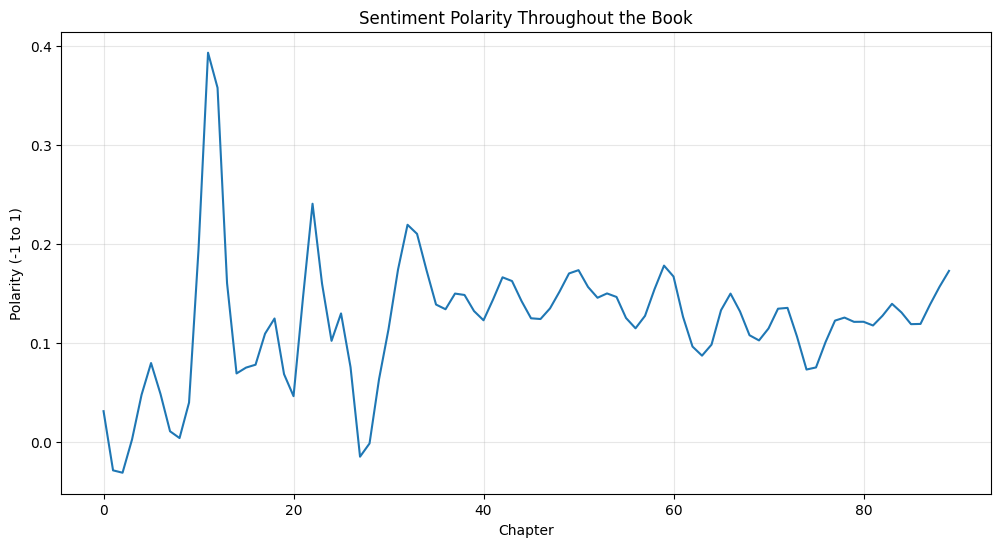

<Figure size 1200x800 with 0 Axes>

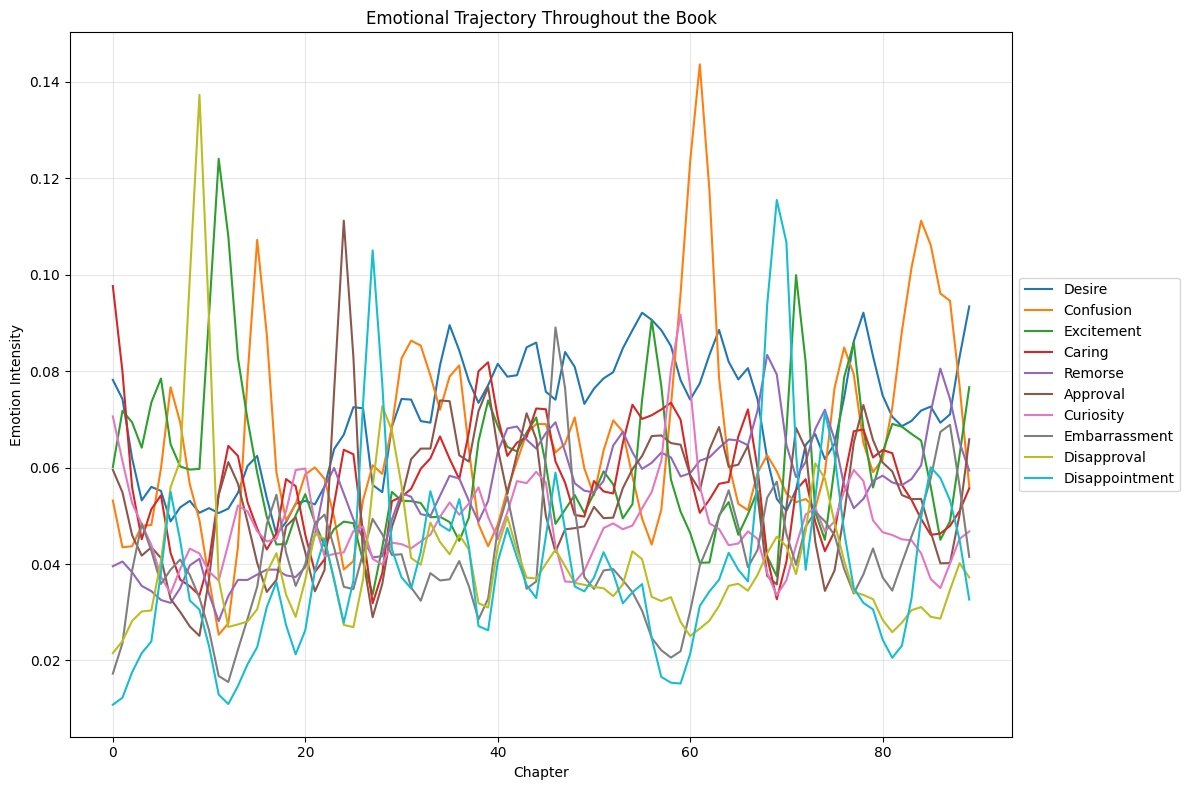

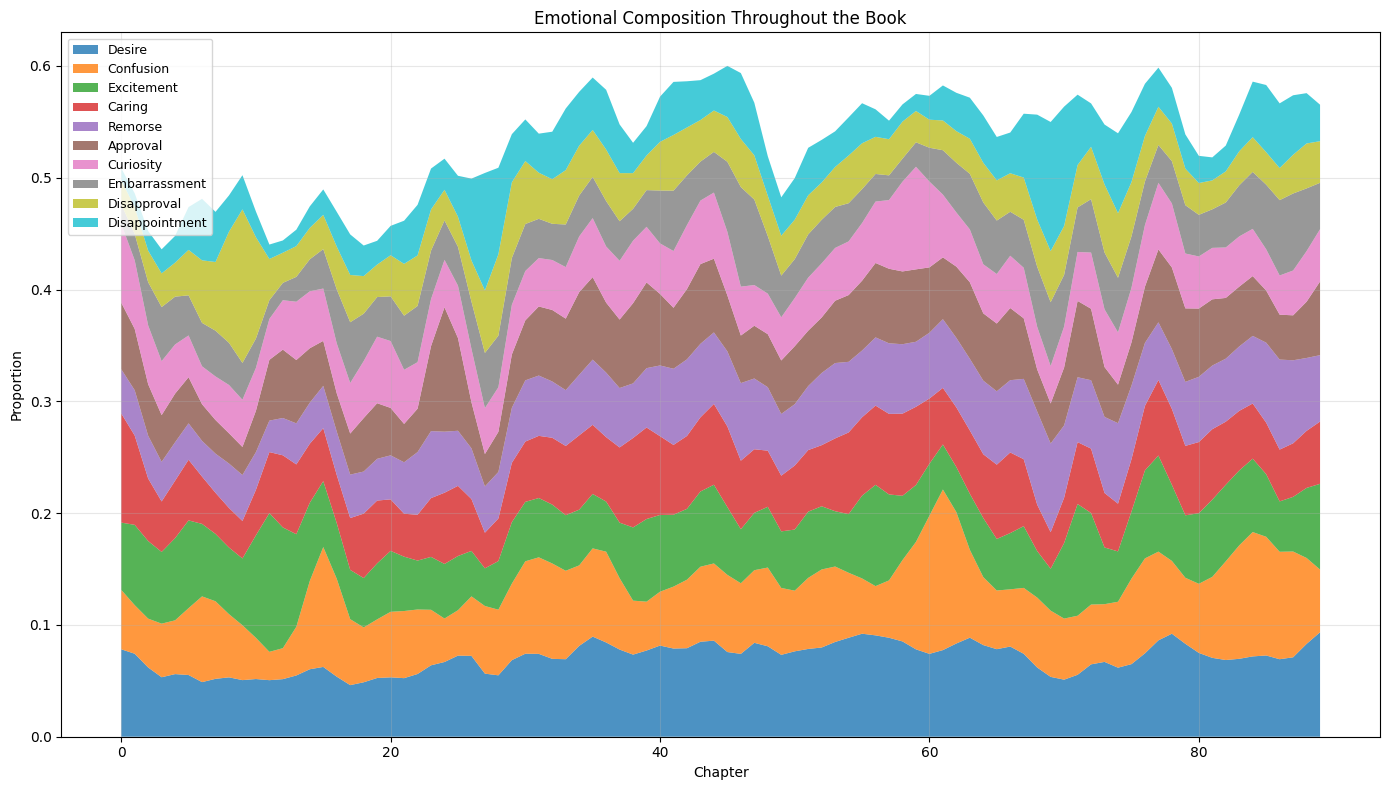

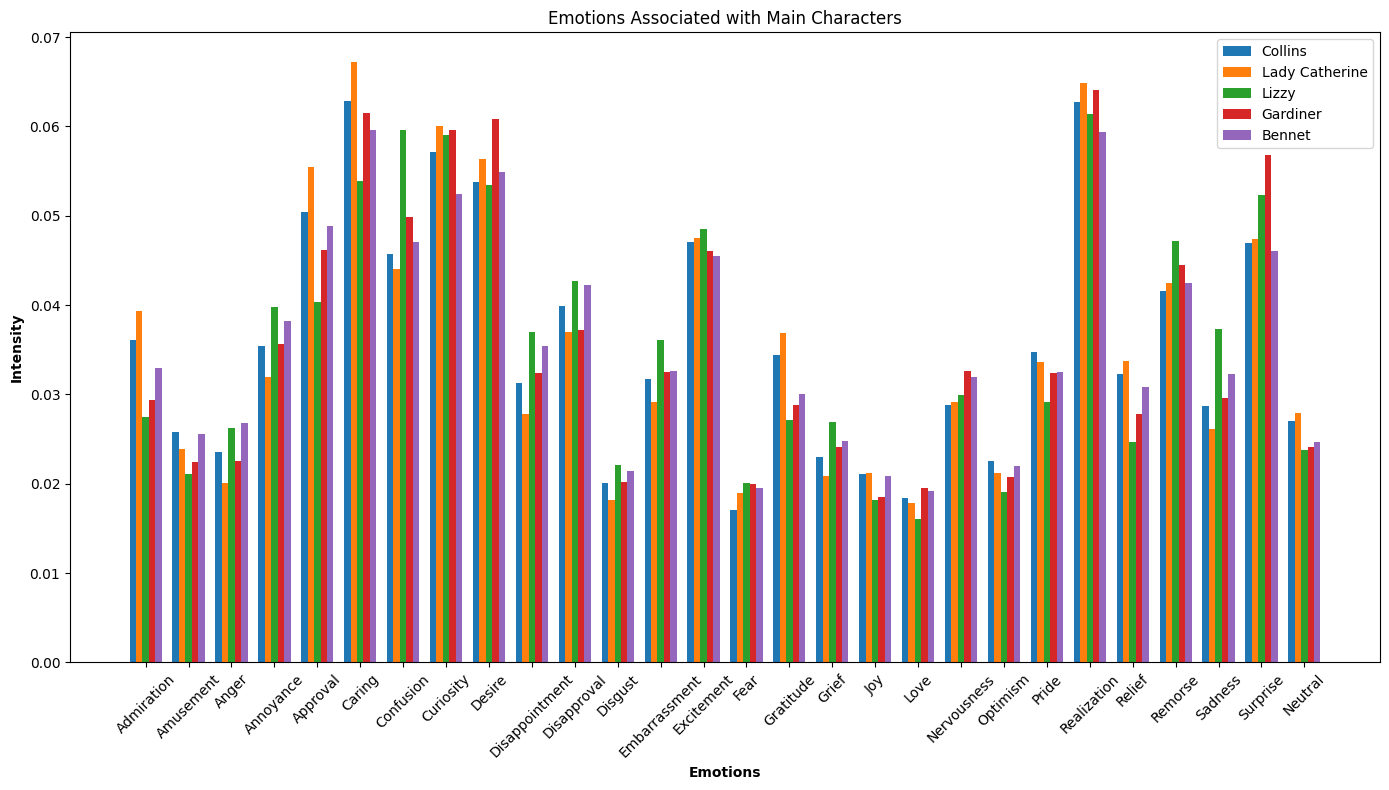

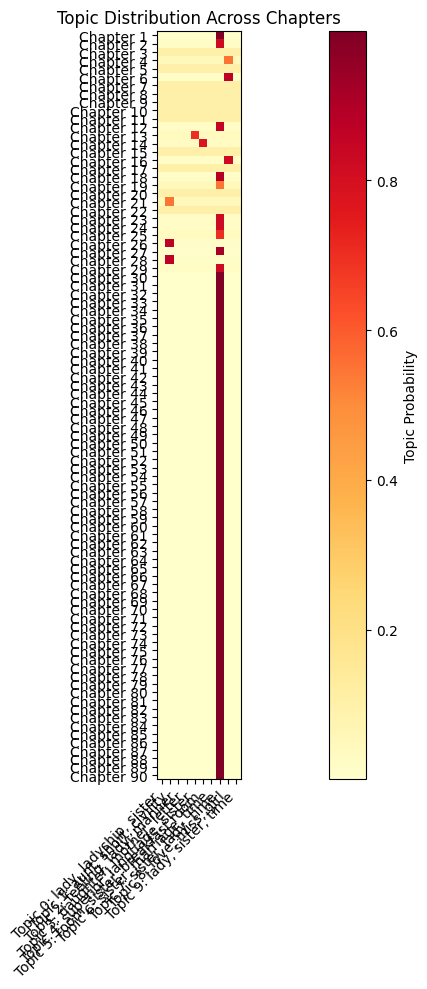

In [ ]:
def extract_title_from_filename(file_path):
    filename = os.path.basename(file_path)
    title, _ = os.path.splitext(filename)
    return title

from google.colab import files
uploaded = files.upload()  # This will prompt you to upload your book file

import io
book_filename = list(uploaded.keys())[0]  # Get the filename of the uploaded book

title, _ = os.path.splitext(book_filename)
print(title)
# Try different encodings
encodings = ['utf-8', 'latin-1', 'cp1252', 'iso-8859-1']
book_text = None

for encoding in encodings:
    try:
        book_text = uploaded[book_filename].decode(encoding)
        print(f"Successfully decoded with {encoding} encoding")
        break
    except UnicodeDecodeError:
        print(f"Failed to decode with {encoding}")

if book_text is None:
    raise Exception("Could not decode the book file with any of the attempted encodings")

# Create extractor and analyze
extractor = BookFeatureExtractor()
book_profile = extractor.extract_book_profile(title, book_text)

# Create visualizations
import os
output_dir = "results"
os.makedirs(output_dir, exist_ok=True)
plot_sentiment_trajectory(book_profile, output_dir)
plot_character_emotions(book_profile, output_dir)
plot_topic_heatmap(book_profile, output_dir)

print("Analysis complete!")

In [ ]:
from pprint import pprint

def print_profile_summary(profile):
    print("\n📘 Profile Summary:")

    print("\n🔝 Top Overall Emotions:")
    top_emotions = sorted(profile["overall_emotions"].items(), key=lambda x: x[1], reverse=True)[:5]
    for emotion, score in top_emotions:
        print(f"  - {emotion.capitalize()}: {score:.3f}")

    print("\n🧑‍🤝‍🧑 Character Emotions:")
    for name, scores in profile["character_emotions"].items():
        top_char_emotions = sorted(scores.items(), key=lambda x: x[1], reverse=True)[:3]
        print(f"  {name}: {', '.join([f'{e} ({s:.2f})' for e, s in top_char_emotions])}")

    print("\n🧠 Top 3 Topics:")
    for tid, words in list(profile["topics"].items())[:10]:
        print(f"  {tid}: {', '.join(words)}")

print_profile_summary(book_profile)


📘 Profile Summary:

🔝 Top Overall Emotions:
  - Joy: 0.582
  - Fear: 0.262
  - Anger: 0.121
  - Sadness: 0.035
  - Admiration: 0.000

🧑‍🤝‍🧑 Character Emotions:
  Elizabeth: realization (0.06), caring (0.06), curiosity (0.06)
  Darcy: realization (0.07), curiosity (0.06), surprise (0.06)
  Jane: realization (0.06), caring (0.06), curiosity (0.06)
  Bennet: caring (0.06), realization (0.06), desire (0.05)
  Collins: caring (0.06), realization (0.06), curiosity (0.06)
  Bingley: realization (0.06), caring (0.06), desire (0.06)
  Wickham: realization (0.07), desire (0.06), caring (0.06)
  Lizzy: realization (0.06), confusion (0.06), curiosity (0.06)
  Gardiner: realization (0.06), caring (0.06), desire (0.06)
  Lady Catherine: caring (0.07), realization (0.06), curiosity (0.06)

🧠 Top 3 Topics:
  topic_0: lady, ladyship, sister, family, room, catherine, illustration, time, little, manner
  topic_1: aunt, short, civility, affair, earnest, unable, syllable, welcome, pleasing, post
  topic_2

recomendations

In [ ]:
book_profiles = [
    {
        "title": "Pride and Prejudice",
        "genre": "romance",
        "overall_emotions": {
            "love": 0.25, "joy": 0.2, "remorse": 0.1, "approval": 0.15, "sadness": 0.1
        },
        "sentiment_trajectory": {
            "smoothed": {
                "polarity": [0.1, 0.2, 0.3, 0.25],
                "emotions": {
                    "joy": [0.2, 0.25, 0.22, 0.2],
                    "sadness": [0.1, 0.05, 0.1, 0.12],
                    "remorse": [0.15, 0.12, 0.1, 0.08],
                },
                "chapter_boundaries": [10, 20, 30, 40]
            }
        },
        "topics": {"Topic 0": ["lady", "family", "ball", "love"]},
        "chapter_topic_distribution": [[0.7, 0.3], [0.6, 0.4], [0.5, 0.5]],
        "character_emotions": {
            "Elizabeth": {"love": 0.3, "joy": 0.2},
            "Darcy": {"remorse": 0.3, "approval": 0.2}
        }
    },
    {
        "title": "War of Shadows",
        "genre": "sci-fi",
        "overall_emotions": {
            "fear": 0.3, "anger": 0.25, "disgust": 0.1, "curiosity": 0.1
        },
        "sentiment_trajectory": {
            "smoothed": {
                "polarity": [-0.1, -0.15, -0.05],
                "emotions": {
                    "fear": [0.3, 0.25, 0.2],
                    "anger": [0.2, 0.22, 0.18]
                },
                "chapter_boundaries": [5, 10, 15]
            }
        },
        "topics": {"Topic 1": ["war", "alien", "invasion", "survival"]},
        "chapter_topic_distribution": [[0.2, 0.8], [0.1, 0.9]],
        "character_emotions": {
            "Commander": {"fear": 0.4},
            "Soldier": {"anger": 0.3}
        }
    },
    {
        "title": "Tears of the Kingdom",
        "genre": "fantasy",
        "overall_emotions": {
            "sadness": 0.35, "grief": 0.25, "remorse": 0.15
        },
        "sentiment_trajectory": {
            "smoothed": {
                "polarity": [-0.2, -0.1, 0.0],
                "emotions": {
                    "sadness": [0.3, 0.4, 0.25],
                    "grief": [0.2, 0.3, 0.25]
                },
                "chapter_boundaries": [6, 12, 18]
            }
        },
        "topics": {"Topic 2": ["king", "curse", "loss", "betrayal"]},
        "chapter_topic_distribution": [[0.8, 0.2], [0.7, 0.3]],
        "character_emotions": {
            "King": {"grief": 0.4},
            "Queen": {"sadness": 0.35}
        }
    },
    {
        "title": "Data Dreams",
        "genre": "sci-fi",
        "overall_emotions": {
            "curiosity": 0.3, "anticipation": 0.2, "surprise": 0.15
        },
        "sentiment_trajectory": {
            "smoothed": {
                "polarity": [0.05, 0.1, 0.2],
                "emotions": {
                    "curiosity": [0.3, 0.35, 0.25],
                    "surprise": [0.1, 0.15, 0.2]
                },
                "chapter_boundaries": [4, 8, 12]
            }
        },
        "topics": {"Topic 3": ["ai", "dream", "experiment", "simulation"]},
        "chapter_topic_distribution": [[0.5, 0.5], [0.4, 0.6]],
        "character_emotions": {
            "Dr. Nova": {"curiosity": 0.4}
        }
    },
    {
        "title": "The Joyful Journey",
        "genre": "self-help",
        "overall_emotions": {
            "joy": 0.4, "optimism": 0.3, "relief": 0.15
        },
        "sentiment_trajectory": {
            "smoothed": {
                "polarity": [0.3, 0.35, 0.4],
                "emotions": {
                    "joy": [0.35, 0.4, 0.45],
                    "relief": [0.2, 0.15, 0.1]
                },
                "chapter_boundaries": [3, 6, 9]
            }
        },
        "topics": {"Topic 4": ["happiness", "life", "growth", "balance"]},
        "chapter_topic_distribution": [[0.6, 0.4], [0.5, 0.5]],
        "character_emotions": {
            "Narrator": {"joy": 0.5}
        }
    }
]


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import numpy as np

class BookRecommender:
    def __init__(self, book_profiles):
        self.book_profiles = book_profiles  # List of book_profile dicts
        self.vectorized_books = self._vectorize_books(book_profiles)

    def _vectorize_books(self, profiles):
        """
        Create a vector representation of each book using emotion profile + trajectory.
        """
        vectors = []
        meta = []
        for book in profiles:
            emotion_vector = [book["overall_emotions"].get(e, 0) for e in profiles[0]["overall_emotions"]]
            trajectory_vector = np.mean([
                np.mean(v) if isinstance(v, list) else v
                for v in book["sentiment_trajectory"]["smoothed"]["emotions"].values()
            ])
            genre = book.get("genre", "unknown")
            vectors.append(np.append(emotion_vector, trajectory_vector))
            meta.append({"title": book["title"], "genre": genre})
        return np.array(vectors), meta

    def recommend_similar(self, book_title, top_k=5):
        """
        Recommend books most similar to the given title (hybrid filtering).
        """
        vectors, meta = self.vectorized_books
        titles = [m['title'] for m in meta]
        if book_title not in titles:
            raise ValueError("Book title not found.")

        idx = titles.index(book_title)
        sims = cosine_similarity([vectors[idx]], vectors)[0]
        sim_scores = sorted([(i, score) for i, score in enumerate(sims) if i != idx], key=lambda x: x[1], reverse=True)

        return [meta[i]["title"] for i, _ in sim_scores[:top_k]]

    def recommend_by_genre_and_emotion(self, genre, eps=0.5, min_samples=2):
        """
        Recommend books within a genre based on emotional clustering.
        """
        vectors, meta = self.vectorized_books
        filtered = [(v, m) for v, m in zip(vectors, meta) if m["genre"].lower() == genre.lower()]
        if not filtered:
            return []

        filtered_vectors = np.array([f[0] for f in filtered])
        filtered_meta = [f[1] for f in filtered]

        scaler = StandardScaler()
        scaled = scaler.fit_transform(filtered_vectors)

        clustering = DBSCAN(eps=eps, min_samples=min_samples).fit(scaled)
        labels = clustering.labels_

        clusters = {}
        for label, book in zip(labels, filtered_meta):
            if label == -1:
                continue  # skip outliers
            clusters.setdefault(label, []).append(book)

        return clusters

    def recommend_by_emotion(self, target_emotion, threshold=0.1):
        """
        Recommend books where a dominant emotional pattern matches a target.
        """
        matches = []
        for book in self.book_profiles:
            emotion_score = book["overall_emotions"].get(target_emotion, 0)
            if emotion_score >= threshold:
                matches.append((book["title"], emotion_score))

        return sorted(matches, key=lambda x: x[1], reverse=True)


In [ ]:
# Load your book_profiles first
recommender = BookRecommender(book_profiles)

# --- EXAMPLE 1: Similar to a specific book ---
recommendations = recommender.recommend_similar("Pride and Prejudice", top_k=3)
for rec in recommendations:
    print("📘", rec)


# --- EXAMPLE 2: Genre-based with emotional DBSCAN ---
recommendations= recommender.recommend_by_genre_and_emotion("romance")
clusters = recommender.recommend_by_genre_and_emotion("romance", eps=1.5, min_samples=1)
for cluster_id, books in clusters.items():
    print(f"\nCluster {cluster_id}:")
    for book in books:
        print(f" - {book['title']}")


# --- EXAMPLE 3: Based on dominant emotion ---
recommendations=recommender.recommend_by_emotion("sadness", threshold=0.12)

for rec in recommendations:
    print("😢", rec)


📘 The Joyful Journey
📘 Tears of the Kingdom
📘 War of Shadows

Cluster 0:
 - Pride and Prejudice
😢 ('Tears of the Kingdom', 0.35)
